# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import prince
import seaborn as sns
import statsmodels.api as sm
from mlxtend.plotting import plot_pca_correlation_graph
from scipy.stats import bartlett, shapiro
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler
from statsmodels.formula.api import ols

In [2]:
np.random.seed(0)
sns.set_theme()

In [3]:
df = pd.read_csv(
    "data/data-cleaned-feature-engineering.csv",
    sep=",",
    index_col="ID",
    parse_dates=True,
)

In [4]:
df_transforme = pd.read_csv(
    "data/data-transformed.csv",
    sep=",",
    index_col="ID",
    parse_dates=True,
)

## Variables globales

In [5]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [6]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

# Analyse multi-variée

## Clustering

In [7]:
scaler = RobustScaler()
df_apres_scale = pd.DataFrame(
    scaler.fit_transform(df[var_numeriques]),
    columns=df[var_numeriques].columns,
)

In [8]:
k3 = KMeans(n_clusters=3)
k4 = KMeans(n_clusters=4)

In [9]:
k3.fit(df_apres_scale[var_numeriques])
k4.fit(df_apres_scale[var_numeriques])

c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [10]:
df["cluster"] = k3.labels_

<Axes: xlabel='cluster', ylabel='Count'>

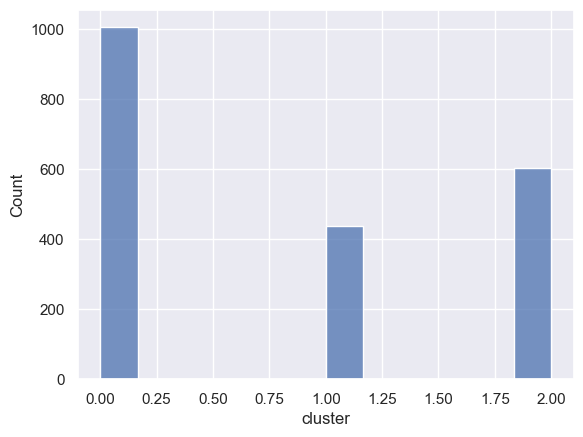

In [11]:
sns.histplot(df["cluster"])

<Axes: xlabel='Income', ylabel='Count'>

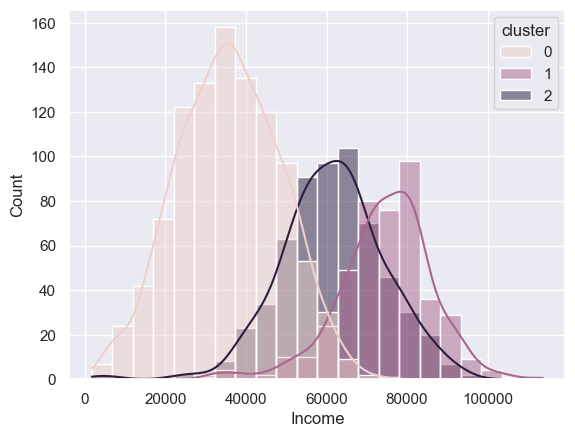

In [12]:
sns.histplot(df, x="Income", hue="cluster", kde=True)

<Axes: xlabel='Year_Birth', ylabel='Income'>

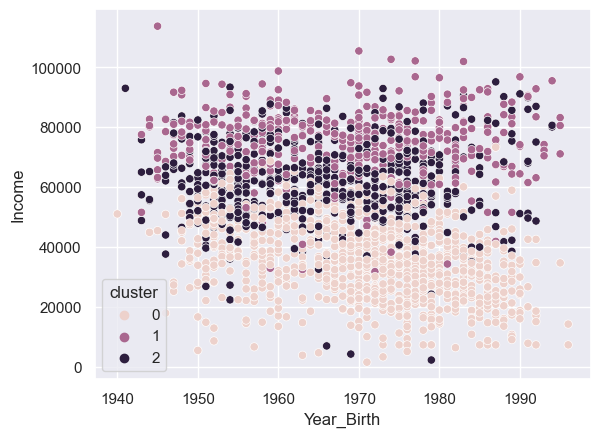

In [13]:
sns.scatterplot(df, x="Year_Birth", y="Income", hue="cluster")

In [14]:
df[var_numeriques + ["cluster"]]

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,cluster
ID,,,,,,,,,,,,,,,
5524,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,1
2174,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0
4141,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,2
6182,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0
5324,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,1986,26816.0,50,5,1,6,3,4,3,1,0,0,3,4,0
10870,1967,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,1
7270,1981,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,2


<Axes: xlabel='cluster', ylabel='Count'>

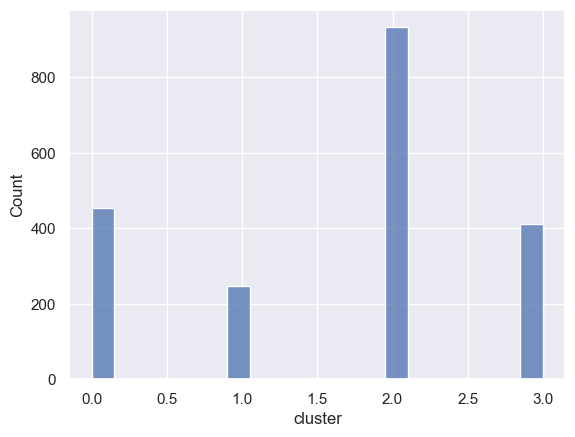

In [15]:
df["cluster"] = k4.labels_
sns.histplot(df["cluster"])

<Axes: xlabel='Income', ylabel='Count'>

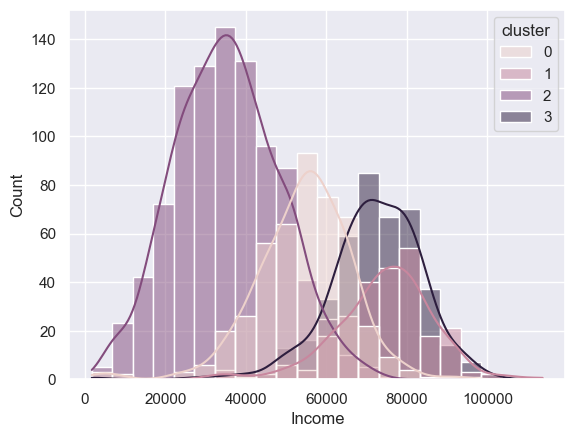

In [16]:
sns.histplot(df, x="Income", hue="cluster", kde=True)

<Axes: xlabel='Year_Birth', ylabel='Income'>

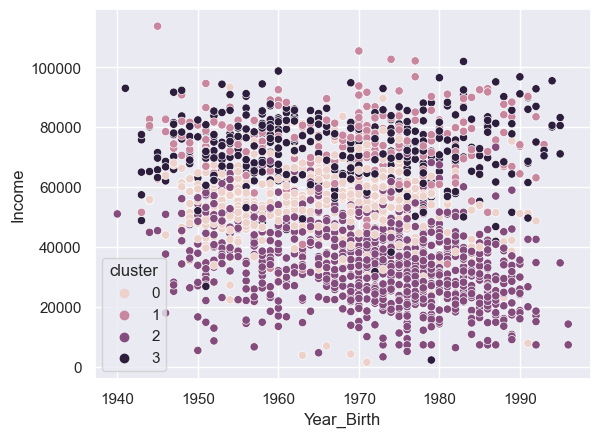

In [17]:
sns.scatterplot(df, x="Year_Birth", y="Income", hue="cluster")

## Analyse en Composantes Principales (ACP)

In [18]:
# todo: centrer / réduire

In [19]:
scaler = StandardScaler()

In [20]:
df_apres_scale = pd.DataFrame(
    scaler.fit_transform(df[var_numeriques]), columns=df[var_numeriques].columns
)

In [21]:
df_apres_scale

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,-1.018191,0.313644,0.311822,0.979058,1.550854,1.715278,2.470350,1.452485,0.849021,0.352265,1.391717,2.639140,-0.554283,0.685454
1,-1.275221,-0.259126,-0.378790,-0.872702,-0.635761,-0.722091,-0.648357,-0.629674,-0.729107,-0.173561,-1.113619,-0.583829,-1.173180,-0.139107
2,-0.332777,0.968050,-0.793157,0.358837,0.570647,-0.175940,1.351284,-0.151017,-0.036270,-0.699388,1.391717,-0.225722,1.302407,-0.551387
3,1.295080,-1.215749,-0.793157,-0.872702,-0.560360,-0.658900,-0.501595,-0.581809,-0.748352,-0.173561,-0.755714,-0.941937,-0.554283,0.273173
4,1.038050,0.321171,1.554923,-0.391956,0.419846,-0.216562,0.158837,-0.007420,-0.555897,1.403918,0.318002,0.132386,0.064613,-0.139107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,1.466433,-1.207493,0.035577,-0.890507,-0.635761,-0.722091,-0.630012,-0.557876,-0.786843,-0.699388,-1.471524,-0.941937,-0.863732,-0.551387
2041,-0.161424,0.463465,-0.102545,1.198658,0.419846,0.072311,0.085456,2.170472,3.909050,-0.173561,1.749622,0.132386,-0.554283,-0.139107
2042,1.038050,0.257455,1.451331,1.789203,0.545514,0.230289,-0.097997,-0.366413,-0.382688,-0.699388,-0.755714,0.132386,2.230753,0.273173
2043,-1.103868,0.853049,-1.414707,0.364772,0.093111,0.216748,0.782579,0.064379,0.329394,-0.173561,0.675907,0.848601,1.302407,-0.963667


In [22]:
# for var in var_numeriques:
#     _, ax = plt.subplots(1, 2, figsize=(8, 2))
#     sns.boxplot(df_apres_scale[var], width=0.25, ax=ax[0])
#     sns.histplot(df_apres_scale[var], kde=True, ax=ax[1])
#     plt.show()

In [23]:
acp = PCA(random_state=0)

In [24]:
acp.fit(df_apres_scale)

PCA(random_state=0)

In [25]:
variance_expliquee = pd.Series(
    acp.explained_variance_ratio_, index=df[var_numeriques].columns
)

In [26]:
variance_expliquee

Year_Birth             0.423069
Income                 0.113425
Recency                0.077540
MntWines               0.071381
MntFruits              0.055963
MntMeatProducts        0.046339
MntFishProducts        0.040906
MntSweetProducts       0.036656
MntGoldProds           0.032329
NumDealsPurchases      0.028392
NumWebPurchases        0.025331
NumCatalogPurchases    0.019622
NumStorePurchases      0.017793
NumWebVisitsMonth      0.011253
dtype: float64

<Axes: >

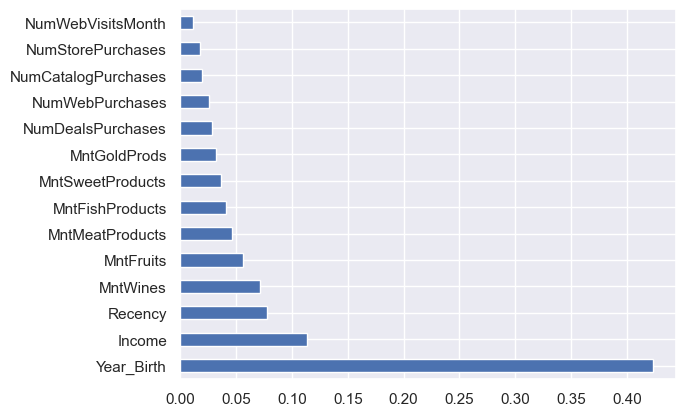

In [27]:
variance_expliquee.plot.barh()

In [28]:
df_acp = pd.DataFrame(acp.fit_transform(df_apres_scale), index=df.index)

In [29]:
df_acp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
ID,,,,,,,,,,,,,,
5524,3.740047,0.686687,0.736646,0.531819,-1.590652,-0.471516,-0.185397,2.593604,0.463178,0.424931,0.433451,-0.730740,0.592373,0.089397
2174,-2.032181,-0.603552,-1.382861,-0.595508,-0.826755,-0.107329,0.347291,0.147818,0.231462,-0.215216,0.107616,-0.134500,-0.315427,-0.227554
4141,1.769018,0.135346,-0.211324,-0.981864,-0.052783,0.148732,-1.094556,-0.839666,-0.852866,1.086079,0.690619,-0.041156,-0.072393,-0.119898
6182,-2.420382,-0.769566,0.959941,-0.628211,0.526074,-0.159783,0.047570,-0.309264,-0.041559,0.139770,0.042381,0.016655,0.134822,0.325988
5324,0.003252,0.532285,0.651654,1.681269,0.491523,-1.145538,0.268150,-0.513649,-0.097351,-0.208174,0.775859,-0.432117,-0.215142,-0.332748


<Axes: xlabel='0', ylabel='1'>

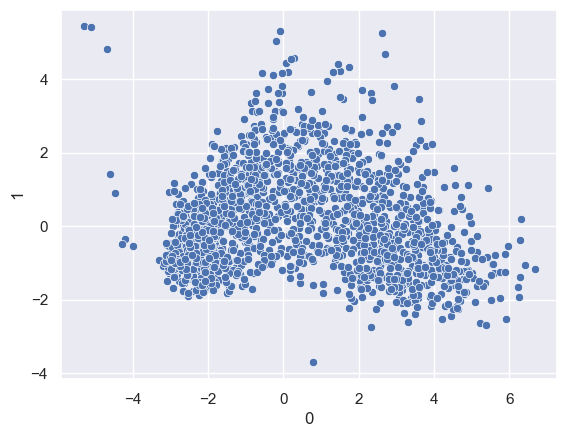

In [30]:
sns.scatterplot(df_acp, x=0, y=1)

### Cercle de corrélations

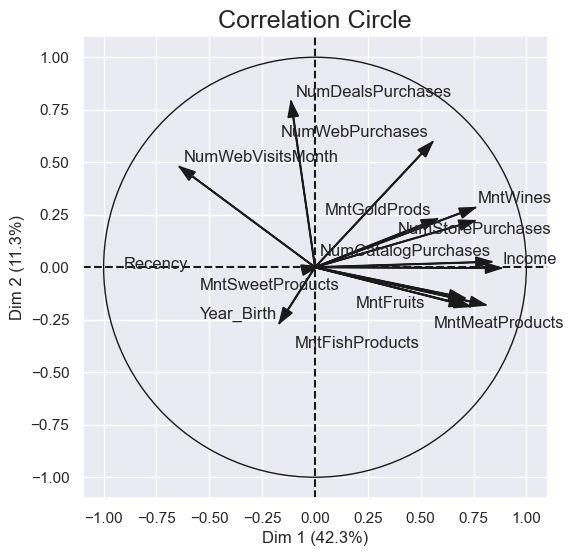

In [31]:
_, correlation_matrix = plot_pca_correlation_graph(
    df_apres_scale,
    df_apres_scale.columns,
    X_pca=df_acp.iloc[:, :2],
    explained_variance=acp.explained_variance_[:2],
    dimensions=(1, 2),
)

<Axes: >

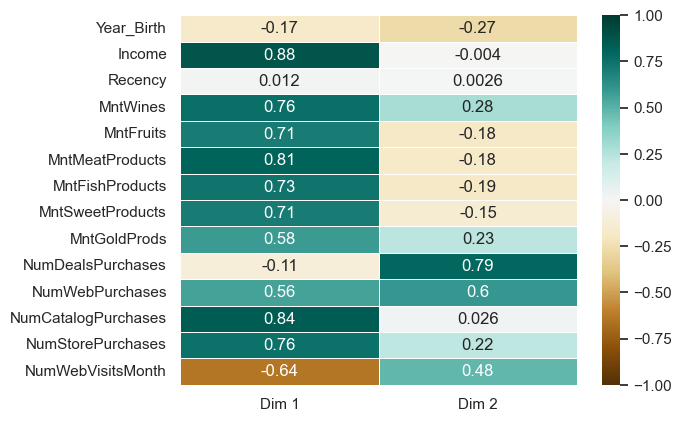

In [32]:
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

### Test clusters

In [33]:
df_acp["clusterk3"] = k3.labels_
df_acp["clusterk4"] = k4.labels_

<Axes: xlabel='0', ylabel='1'>

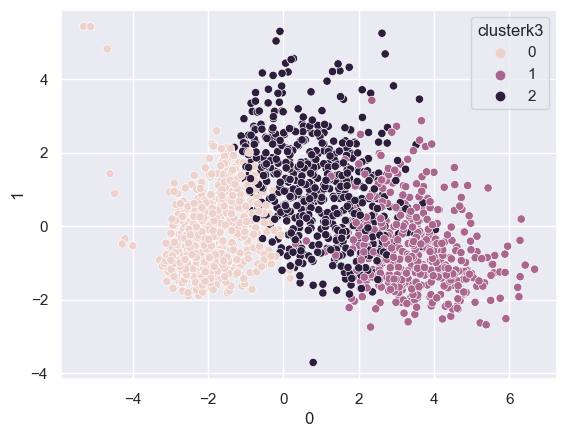

In [34]:
sns.scatterplot(df_acp, x=0, y=1, hue="clusterk3")

In [35]:
df_acp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,clusterk3,clusterk4
ID,,,,,,,,,,,,,,,,
5524,3.740047,0.686687,0.736646,0.531819,-1.590652,-0.471516,-0.185397,2.593604,0.463178,0.424931,0.433451,-0.730740,0.592373,0.089397,1,1
2174,-2.032181,-0.603552,-1.382861,-0.595508,-0.826755,-0.107329,0.347291,0.147818,0.231462,-0.215216,0.107616,-0.134500,-0.315427,-0.227554,0,2
4141,1.769018,0.135346,-0.211324,-0.981864,-0.052783,0.148732,-1.094556,-0.839666,-0.852866,1.086079,0.690619,-0.041156,-0.072393,-0.119898,2,3
6182,-2.420382,-0.769566,0.959941,-0.628211,0.526074,-0.159783,0.047570,-0.309264,-0.041559,0.139770,0.042381,0.016655,0.134822,0.325988,0,2
5324,0.003252,0.532285,0.651654,1.681269,0.491523,-1.145538,0.268150,-0.513649,-0.097351,-0.208174,0.775859,-0.432117,-0.215142,-0.332748,2,0


<Axes: xlabel='0', ylabel='1'>

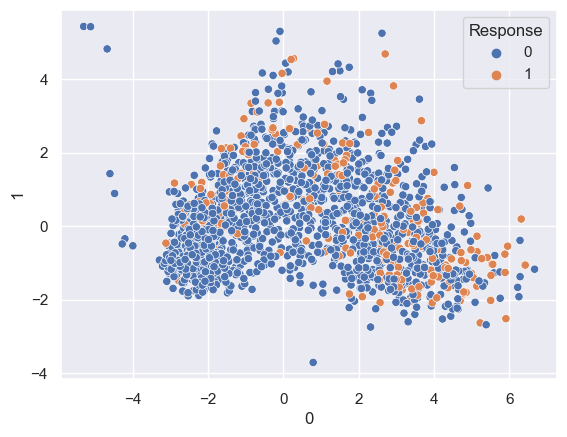

In [36]:
sns.scatterplot(df_acp, x=0, y=1, hue=df["Response"])

<Axes: xlabel='0', ylabel='2'>

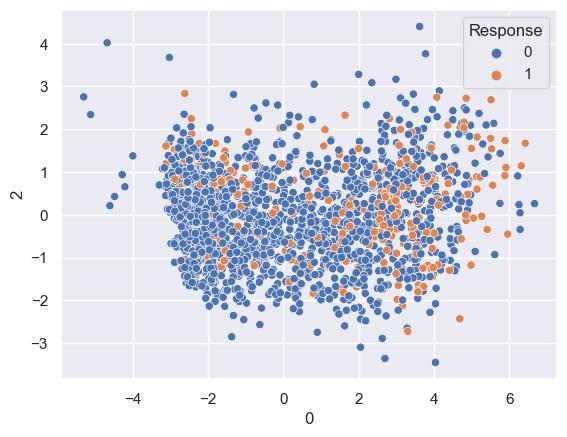

In [37]:
sns.scatterplot(df_acp, x=0, y=2, hue=df["Response"])

<Axes: xlabel='0', ylabel='1'>

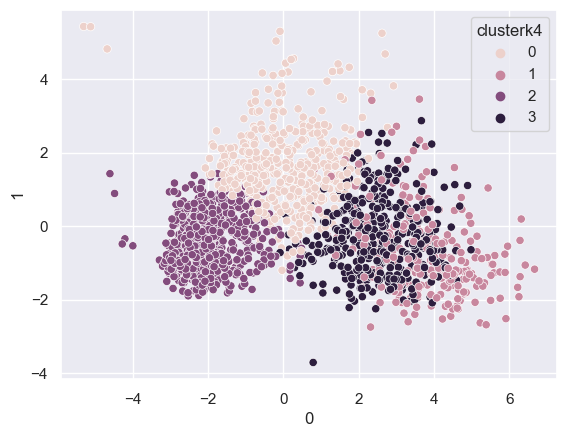

In [38]:
sns.scatterplot(df_acp, x=0, y=1, hue="clusterk4")

## Analyse Factorielle des Correspondances (AFC)

In [39]:
table_contingence = pd.crosstab(df["Kidhome"], df["Teenhome"])

In [40]:
table_contingence

Teenhome,0,1,2
Kidhome,,,
0,571,576,28
1,463,342,22
2,17,26,0


In [41]:
ca = prince.CA(
    # n_components=3,
    # n_iter=3,
    # copy=True,
    # check_input=True,
    # engine='sklearn',
    random_state=0
)

ca = ca.fit(table_contingence)

In [42]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.007,96.63%,96.63%
1,0.000,3.37%,100.00%


In [43]:
ca.plot(table_contingence)

alt.Chart(...)

In [44]:
table_contingence = pd.crosstab(df["Marital_Status"], df["Education"])

In [45]:
table_contingence

Education,2n Cycle,Basic,Graduation,Master,PhD
Marital_Status,,,,,
Divorced,21,1,112,33,47
Married,71,18,396,131,176
Single,37,18,234,69,93
Together,53,11,253,94,106
Widow,5,1,31,12,22


In [46]:
ca = prince.CA(random_state=0)
ca = ca.fit(table_contingence)

In [47]:
ca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.005,60.86%,60.86%
1,0.002,26.46%,87.32%


In [48]:
ca.plot(table_contingence)

alt.Chart(...)

In [49]:
# todo: à interpréter

## Analyse des Correspondances Multiples (ACM)

In [50]:
mca = prince.MCA(random_state=0)
mca = mca.fit(df[var_categoriques])

In [51]:
mca.plot(df[var_categoriques])

alt.Chart(...)

In [52]:
# todo: à interpréter

# ANOVA

## Problématique

Nous allons tester l'indépendance entre la variable `Response` (catégorique, binaire) et `Income` (quantitative continue), pour répondre à la question : "le revenu influence-t-il la réponse aux campagnes marketing ?".

<Axes: xlabel='Response', ylabel='Income'>

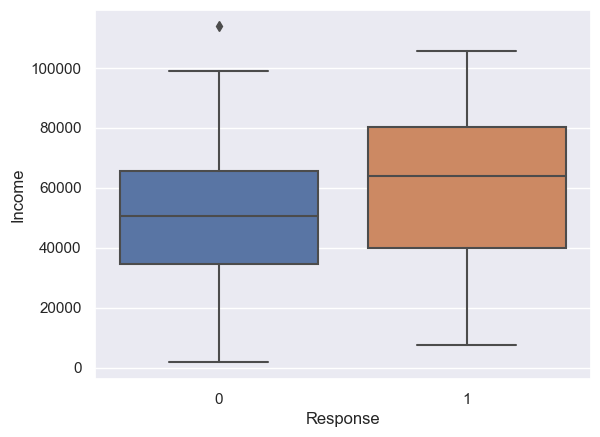

In [53]:
sns.boxplot(df, x="Response", y="Income")

On cherche à déterminer si les moyennes des groupes sont significativement différentes.  
Pour cela, on utilise une ANOVA qui fait le rapport des variances interclasse et intraclasse.  

On pose donc :

$H_0$ : Les moyennes de chaque groupe sont égales si la p-value $> 5\%$
$H_1$ : Les moyennes de chaque groupe ne sont pas toutes égales si la p-value $< 5\%$


## Hypothèses

1) la variable d'intérêt est qualitative, la variable explicative est quantitative
1) l’indépendance entre les échantillons de chaque groupe
2) l’égalité des variances que l’on peut verifier avec un test de Bartlett.
3) la normalité des résidus avec un test de Shapiro.

### Indépendance

In [69]:
from scipy.stats import chi2_contingency as chi2_contingency

In [72]:
anova_group_1 = df[df["Response"] == 1]["Income"]
anova_group_2 = df[df["Response"] == 0]["Income"]

In [ ]:
khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)

### Egalité des variances

#### Somme des Carrés des Ecarts (SCE) interclasse

$$ SCEinterclasse = \sum\limits_{k=1}^{N}(\bar{Y_k}\ - \bar{Y})^2 * u_k $$

où $ \bar{Y_k} $ est la valeur de la moyenne du groupe k, $ \bar{Y} $ est la moyenne de la population totale et $ u_k $ est le poids du groupe k et N est le nombre de groupe.

#### SCE intraclasse

$$ SCEintraclasse = \sum\limits_{k=1}^{N} \sum\limits_{i=1}^{n_k} (X_i^k - \bar{Y_k})^2 $$

où $n_k$ est le nombre d'individus dans le groupe k
  
On a alors $ SCEtotale = SCEintraclasse + SCEinterclasse $

Voici la variance de chaque groupe :

In [54]:
df.groupby("Response")["Income"].agg("var")

Response
0    3.895393e+08
1    5.353886e+08
Name: Income, dtype: float64

Nous allons effectuer un test de Bartlett pour vérifier l'égalité des variances.

$H_0$ : Les variances de chaque groupe sont égales si p-value $> 5\%$
$H_1$ : Les variances de chaque groupe ne sont pas toutes égales $< 5\%$


In [55]:
bartlett(
    df["Income"][df["Response"] == "0"],
    df["Income"][df["Response"] == "1"],
)

BartlettResult(statistic=nan, pvalue=nan)

Notre p-value est inférieure à 5%, donc les variances ne sont pas toutes égales au (risque de 5%).

### Normalité des résidus

Nous utilisons le test de Shapiro-Wilk pour vérifier la normalité des résidus.

H0 : Les résidus suivent une loi normale si p-value > 5%
H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [56]:
model = ols("Income ~ Response", data=df).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.9858090281486511, pvalue=2.2619989106624494e-13)

Comme la p-value est inférieure à 5%, les résidus ne suivent pas une loi normale (au risque de 5%).

## Test d'ANOVA

H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5%

In [57]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Response,2.603158e+10,1.0,63.234078,3.009743e-15
Residual,8.410420e+11,2043.0,NaN,NaN


Comme aucune hypothèse n'est vérifiée, le test n'est pas fiable.

In [58]:
# todo: tenter le GLS

# Sauvegarde du Dataframe

In [59]:
cluster3 = pd.DataFrame(k3.labels_, columns=["cluster3"])
cluster4 = pd.DataFrame(k4.labels_, columns=["cluster4"])

In [60]:
cluster3.to_csv("data/clusters-kmeans3.csv")
cluster4.to_csv("data/clusters-kmeans4.csv")